In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.datasets import make_circles
from scipy.special import expit
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.metrics import classification_report
from matplotlib import cm

%matplotlib notebook

In [21]:
N = 1000

x = np.linspace(-4.0, 3.0, N).reshape(N, 1)

g = 1.0 + 2.0*x

h = expit(g)

y = np.zeros((len(h), 1))
for i in range(0, len(h)):
    if(h[i] >= 0.5):
        y[i,0] = 1.0

<IPython.core.display.Javascript object>


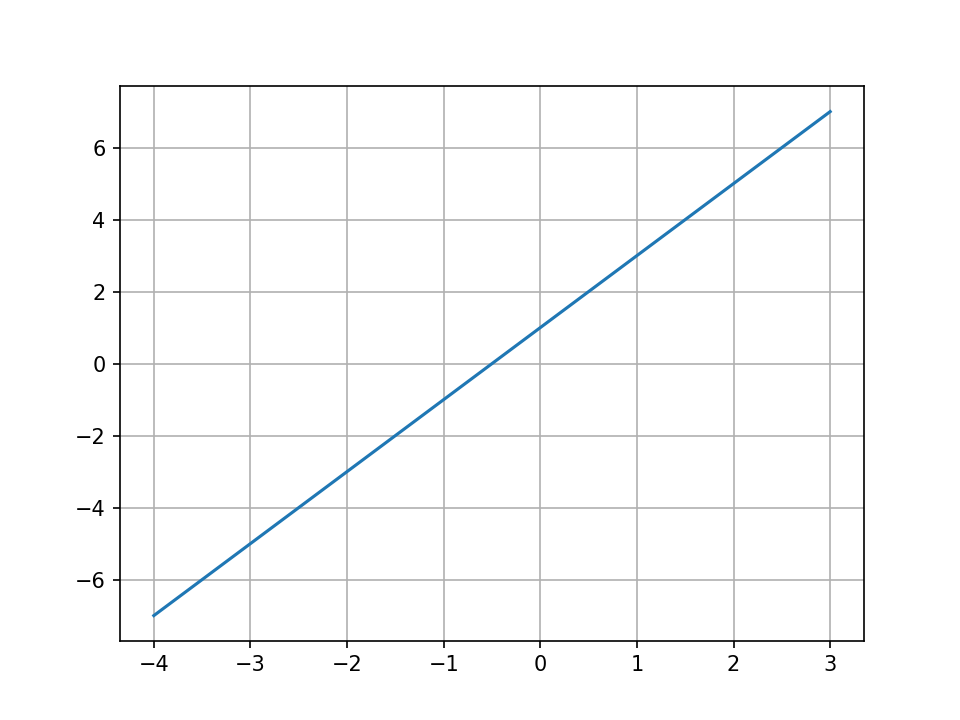

In [22]:
plt.figure()
plt.plot(x,g)
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


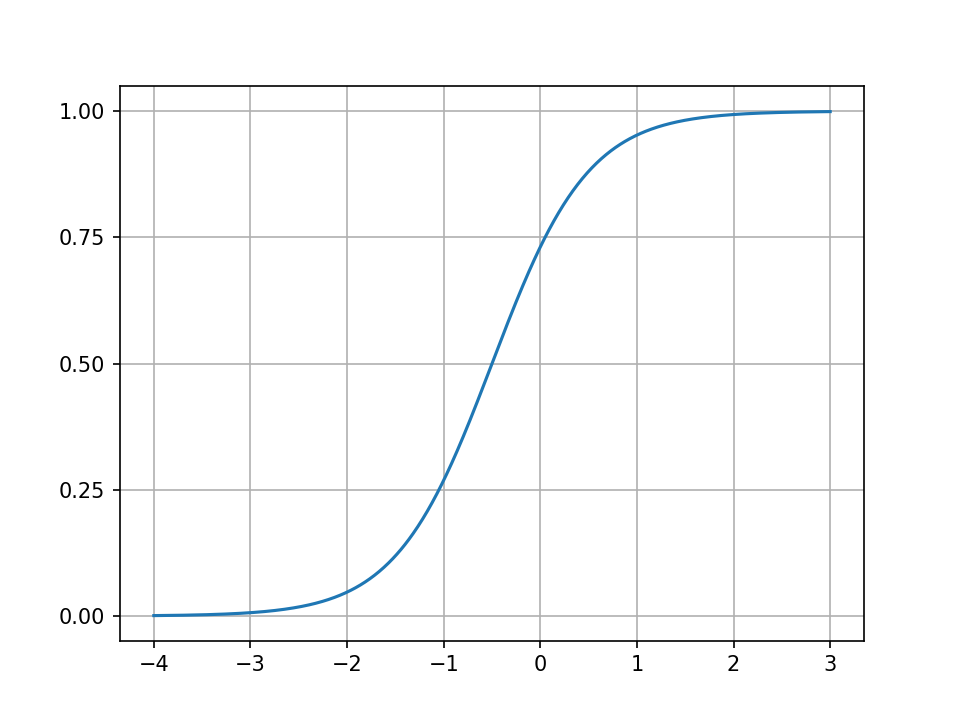

In [23]:
plt.figure()
plt.plot(x,h)
plt.grid()
plt.yticks([0.0, 0.25, 0.5, 0.75, 1.0])
plt.show()

In [24]:
def error_function(x, a, y):    
    h = expit(x.dot(a))
    error = (1.0/len(y))*np.sum(np.power(y - h, 2.0))
    return error

def classifier(x, a):
    h = expit(x.dot(a))
    c = np.zeros((len(h), 1))
    for i in range(0, len(h)):
        if(h[i] >= 0.5):
            c[i,0]=1.0
    return c

def predict_prob(x, a):
    h1 = expit(x.dot(a))
    h0 = 1 - h1
    h = np.c_[h0, h1]
    return h

In [25]:
# Generate values for parameters.
M = 600
a0 = np.linspace(-5000.0, 5004.0, M)
a1 = np.linspace(-5000.0, 5004.0, M)

A0, A1 = np.meshgrid(a0, a1)

# Generate points for plotting the cost-function surface.
J = np.zeros((M,M))
for iter1 in range(0, M):
    for iter2 in range(0, M):
        yhat = expit(A0[iter1, iter2] + A1[iter1, iter2]*x)
        J[iter1, iter2] = (1.0/N)*np.sum(np.square(y - yhat))

<IPython.core.display.Javascript object>


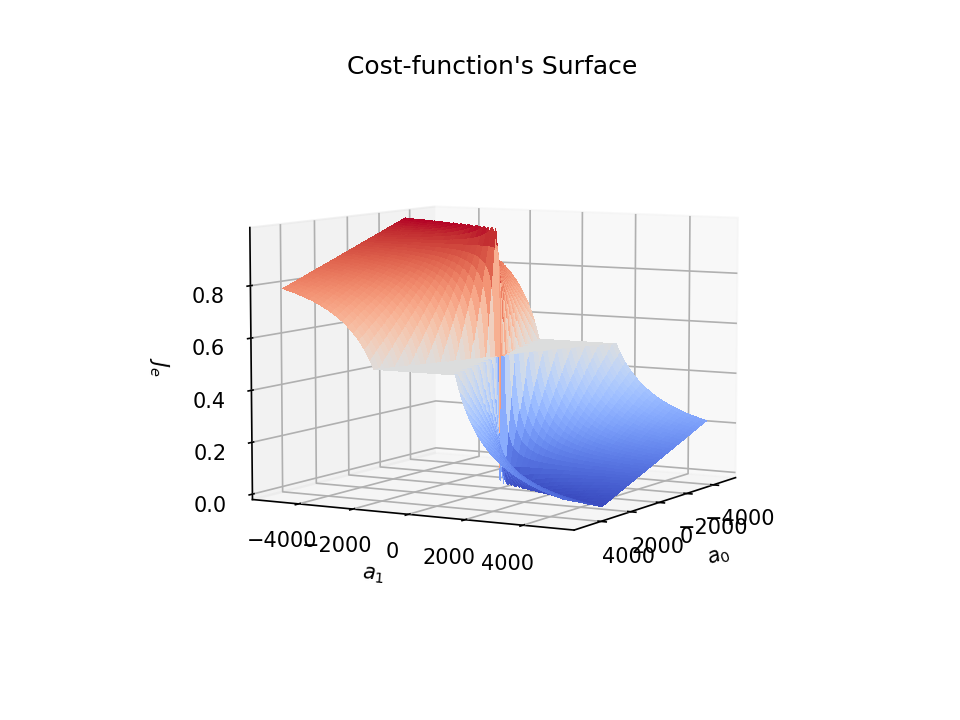

In [26]:
# Plot cost-function surface.
plt.figure()
ax = plt.subplot(projection='3d')
surf = ax.plot_surface(A0, A1, J, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_xlabel('$a_0$')
ax.set_ylabel('$a_1$')
ax.set_zlabel('$J_e$');
plt.title('Cost-function\'s Surface')
#ax.view_init(20, 110)
#Show the plot.
plt.show()

In [19]:
plt.figure()
cp = plt.contour(A0, A1, J)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('$a_0$')
plt.ylabel('$a_1$')
plt.title('Cost-function\'s Contour')
plt.xticks(np.arange(-5000, 5004, step=1000.0))
plt.yticks(np.arange(-5000, 5004, step=1000.0))
plt.show()

# Modified error function.

In [27]:
# Generate values for parameters.
M = 600
a0 = np.linspace(-5000.0, 5004.0, M)
a1 = np.linspace(-5000.0, 5004.0, M)

A0, A1 = np.meshgrid(a0, a1)

eps = 1e-9

# Generate points for plotting the cost-function surface.
J = np.zeros((M,M))
for iter1 in range(0, M):
    for iter2 in range(0, M):
        yhat = expit(A0[iter1, iter2] + A1[iter1, iter2]*x)
        J[iter1, iter2] = (1.0/N)*np.sum(y*np.log(yhat + eps) + (1.0 - y)*np.log((1.0 - yhat) + eps))

<IPython.core.display.Javascript object>


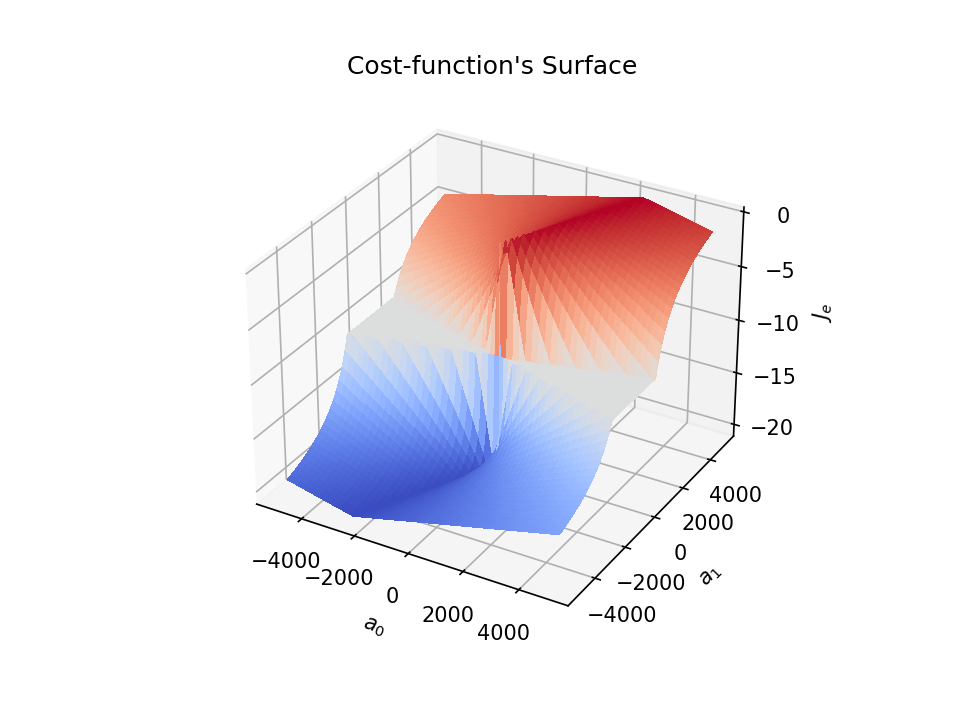

In [28]:
# Plot cost-function surface.
plt.figure()
ax = plt.subplot(projection='3d')
surf = ax.plot_surface(A0, A1, J, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_xlabel('$a_0$')
ax.set_ylabel('$a_1$')
ax.set_zlabel('$J_e$');
plt.title('Cost-function\'s Surface')
#ax.view_init(20, 110)
#Show the plot.
plt.show()

<IPython.core.display.Javascript object>


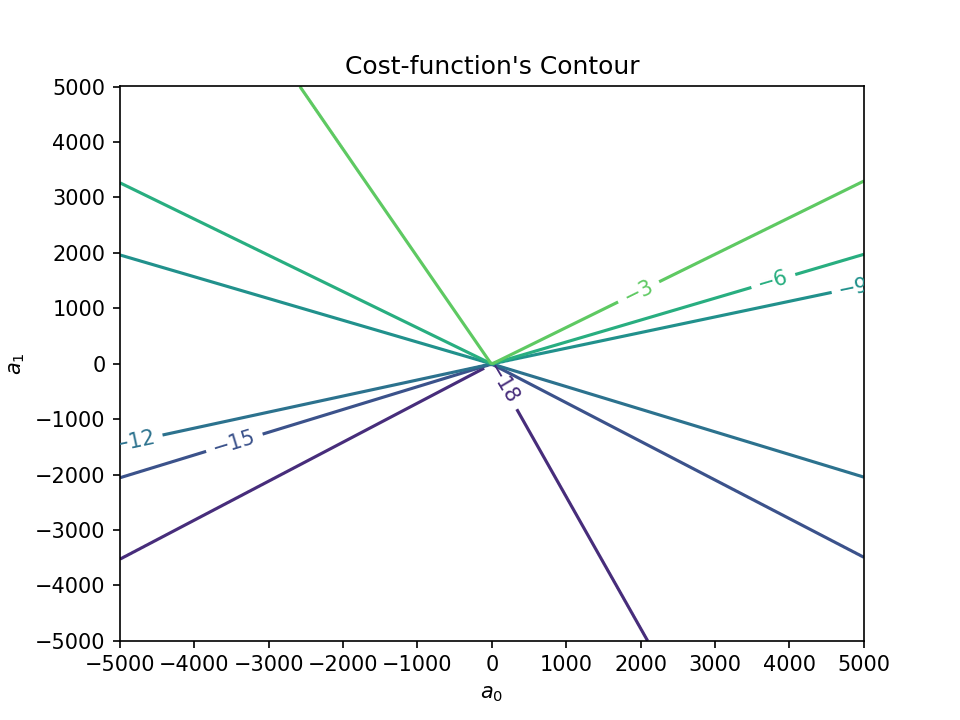

In [29]:
plt.figure()
cp = plt.contour(A0, A1, J)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('$a_0$')
plt.ylabel('$a_1$')
plt.title('Cost-function\'s Contour')
plt.xticks(np.arange(-5000, 5004, step=1000.0))
plt.yticks(np.arange(-5000, 5004, step=1000.0))
plt.show()